<a href="https://colab.research.google.com/github/suri199507/Deep-Learning-Computer-vision-projects/blob/main/game_of_deep_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

 


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

download = drive.CreateFile({'id':'1LCkqGbtEzg4eVMHtrtoNw19XTCakGjjq'})
download.GetContentFile('train.zip')

In [ ]:
!unzip --qq train

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
file_path='train'
train=pd.read_csv(os.path.join(file_path,'train.csv'))
test=pd.read_csv(os.path.join(file_path,'test_ApKoW4T.csv'))


In [ ]:


train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [ ]:
temp=[]
for img_name in train.image:
    img_path=os.path.join(file_path,'images',img_name)
    img=cv2.imread(img_path)
    img=cv2.resize(img,(74,74))
    img = img.astype('float64')
    temp.append(img)
    
train_x=np.asarray(temp)

In [ ]:
temp = []
for img_name in test.image:
    img_path = os.path.join(file_path, 'images', img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (74, 74))
    img = img.astype('float64')
   
   
    
    temp.append(img)
  

In [ ]:
train_x.shape

(6252, 74, 74, 3)

In [ ]:
test_x=np.asarray(temp)

In [ ]:
train_img=train_x/255.0
test_img=test_x/255.0







In [ ]:
for categorys in train.category:
        if categorys =='Cargo':
            category=1
            
        elif categorys == 'Military':
            category = 2
        elif categorys == 'Carrier':
            category = 3
        elif categorys == 'Cruise':
            category = 4
        elif categorys == 'Tankers':
            category == 5
        

In [ ]:
def get_classlabel(class_code):
    for categorys in train.category:
        categorys= {2:'Military', 4:'Cruise', 1:'Cargo', 3:'Carrier', 5:'Tankers'}
    
    return categorys[class_code]

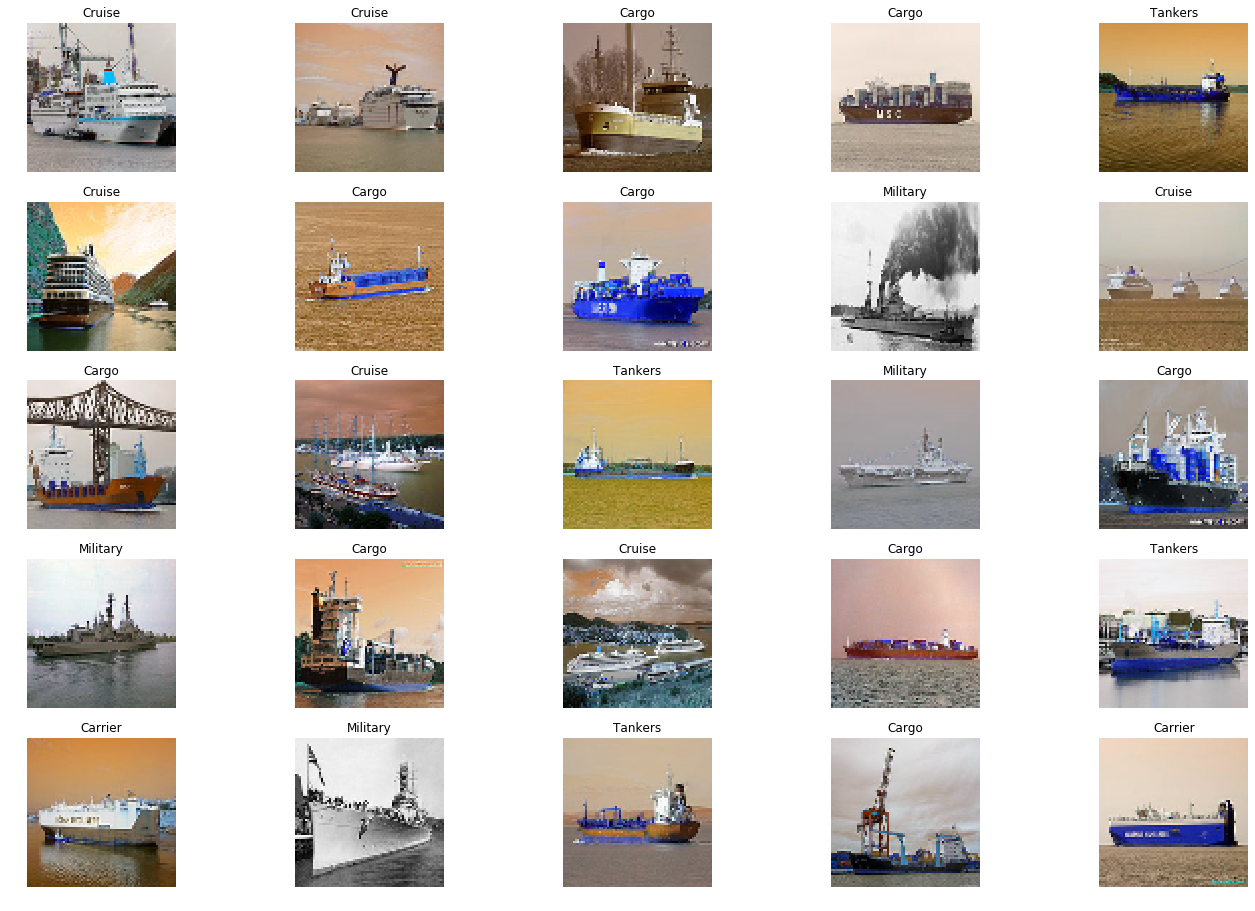

In [ ]:
import matplotlib.pyplot as plot
from random import randint
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_img))
        ax[i,j].imshow(train_img[rnd_number])
        ax[i,j].set_title(get_classlabel(train.category[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
print("Shape of Images:",train_x.shape)
print("Shape of Labels:",train.category.shape)

Shape of Images: (6252, 74, 74, 3)
Shape of Labels: (6252,)


In [ ]:
train.category.unique(),train.category.shape

(array([1, 2, 3, 4, 5]), (6252,))

In [ ]:
from keras.utils import to_categorical
y=to_categorical(train.category)

Using TensorFlow backend.


In [ ]:
y.shape

(6252, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_img,y,test_size=0.2,
                                                                              random_state=42)

In [ ]:
print(np.array(X_train).shape, np.array(y_train).shape, np.array(X_test).shape, np.array(y_test).shape)

(5001, 98, 98, 3) (5001, 6) (1251, 98, 98, 3) (1251, 6)


In [ ]:
from keras.applications import VGG16
VGG_model=VGG16(weights="imagenet",include_top=False,input_shape=(74,74,3))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(7)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator



In [ ]:
for layer in VGG_model.layers[:-8]:
  layer.trainable=False
  
for layer in VGG_model.layers:
  print(layer,layer.trainable)
  

<keras.engine.input_layer.InputLayer object at 0x7f0174f8fe48> False
<keras.layers.convolutional.Conv2D object at 0x7f0174f8f550> False
<keras.layers.convolutional.Conv2D object at 0x7f0174642550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0174612c88> False
<keras.layers.convolutional.Conv2D object at 0x7f0174612cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f0174ee7828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0174e9dc50> False
<keras.layers.convolutional.Conv2D object at 0x7f0174e9d9b0> False
<keras.layers.convolutional.Conv2D object at 0x7f0174ec6ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f0174e70240> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0174e89ac8> False
<keras.layers.convolutional.Conv2D object at 0x7f0174e89630> True
<keras.layers.convolutional.Conv2D object at 0x7f0174e342e8> True
<keras.layers.convolutional.Conv2D object at 0x7f0174e4bd30> True
<keras.layers.pooling.MaxPooling2D object at 0x7f0174df55c0> Tr

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras import regularizers
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(VGG_model)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dropout(0.10))

model.add(layers.Dense(1020,activation='relu'))

model.add(layers.Dropout(0.85))
model.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1020)              2089980   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1020)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 6126      
Total params: 16,810,794
Trainable params: 15,075,306
Non-trainable params: 1,735,488
________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
                            optimizer=optimizers.Adam(0.0001),
              metrics=['acc'])

In [ ]:

trained=model.fit(X_train,y_train,epochs=25,batch_size = 128,validation_data=(X_test,y_test))

Train on 5001 samples, validate on 1251 samples
Epoch 1/25
5001/5001 [==============================] - 21s 4ms/step - loss: 1.7360 - acc: 0.2771 - val_loss: 1.4626 - val_acc: 0.3341
Epoch 2/25
5001/5001 [==============================] - 10s 2ms/step - loss: 1.4608 - acc: 0.3729 - val_loss: 1.5725 - val_acc: 0.2022
Epoch 3/25
5001/5001 [==============================] - 10s 2ms/step - loss: 1.1226 - acc: 0.5399 - val_loss: 1.3342 - val_acc: 0.5244
Epoch 4/25
5001/5001 [==============================] - 10s 2ms/step - loss: 0.7459 - acc: 0.7063 - val_loss: 0.7028 - val_acc: 0.7386
Epoch 5/25
5001/5001 [==============================] - 10s 2ms/step - loss: 0.6078 - acc: 0.7576 - val_loss: 0.5844 - val_acc: 0.7778
Epoch 6/25
5001/5001 [==============================] - 10s 2ms/step - loss: 0.4946 - acc: 0.8036 - val_loss: 0.8163 - val_acc: 0.6523
Epoch 7/25
5001/5001 [==============================] - 10s 2ms/step - loss: 0.4385 - acc: 0.8250 - val_loss: 0.7819 - val_acc: 0.7306
Epoch 8

KeyboardInterrupt: ignored

In [ ]:
trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


In [ ]:
history = model.fit_generator(
  trainAug.flow(X_train,y_train),
      steps_per_epoch=X_train.shape[0]/32 ,
        epochs=50,
      validation_data=(X_test,y_test),
      validation_steps=X_test.shape[0]/32)

Epoch 1/50
157/156 [==============================] - 11s 68ms/step - loss: 0.6247 - acc: 0.7634 - val_loss: 0.5507 - val_acc: 0.8066
Epoch 2/50
157/156 [==============================] - 11s 68ms/step - loss: 0.5244 - acc: 0.8016 - val_loss: 0.4267 - val_acc: 0.8449
Epoch 3/50
157/156 [==============================] - 11s 68ms/step - loss: 0.4747 - acc: 0.8228 - val_loss: 0.4164 - val_acc: 0.8313
Epoch 4/50
157/156 [==============================] - 11s 68ms/step - loss: 0.4404 - acc: 0.8359 - val_loss: 0.5178 - val_acc: 0.8106
Epoch 5/50
157/156 [==============================] - 11s 68ms/step - loss: 0.3976 - acc: 0.8485 - val_loss: 0.4844 - val_acc: 0.8401
Epoch 6/50
157/156 [==============================] - 11s 68ms/step - loss: 0.3899 - acc: 0.8535 - val_loss: 0.4499 - val_acc: 0.8449
Epoch 7/50
157/156 [==============================] - 11s 67ms/step - loss: 0.3636 - acc: 0.8638 - val_loss: 0.4035 - val_acc: 0.8545
Epoch 8/50
157/156 [==============================] - 11s 67ms

In [ ]:
from keras.applications import ResNet50
ResNet50=ResNet50(weights="imagenet",include_top=False,input_shape=(98,98,3))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
resnet.compile(loss='categorical_crossentropy',
                            optimizer=optimizers.adam(0.0001),
              metrics=['acc'])

In [ ]:
pred=model.predict_classes(test_img)

In [ ]:
Sub=pd.DataFrame({"image":test["image"],"category":pred})

In [ ]:
Sub.to_csv('Vgg16.csv', header=True, index=False)


In [ ]:
from google.colab import files
files.download('Vgg16.csv') 

In [ ]:
history

history
